In [2]:
import numpy as np
import tskit
import matplotlib.pyplot as plt

from matplotlib import font_manager

font_dirs = ["/home/hblee/.conda/envs/tskit_dev/fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    try:
        font_manager.fontManager.addfont(font_file)
    except:
        pass
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.fontset"] = 'cm'

In [3]:
preds = [
    np.load('pred/pred_n%d.npy' % num) 
    for num in [2000, 5000, 10000, 20000, 50000, 100000]
]

In [4]:
corr = np.zeros((len(preds), 6, 3))
for i in range(len(preds)):
    for j in range(6):
        for k in range(5):
            corr[i,j,:] += np.corrcoef(preds[i][j][k])[0,1:]

corr /= 5
corr = np.nan_to_num(corr, 0)

/home/hblee/.conda/envs/tskit_dev/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/hblee/.conda/envs/tskit_dev/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


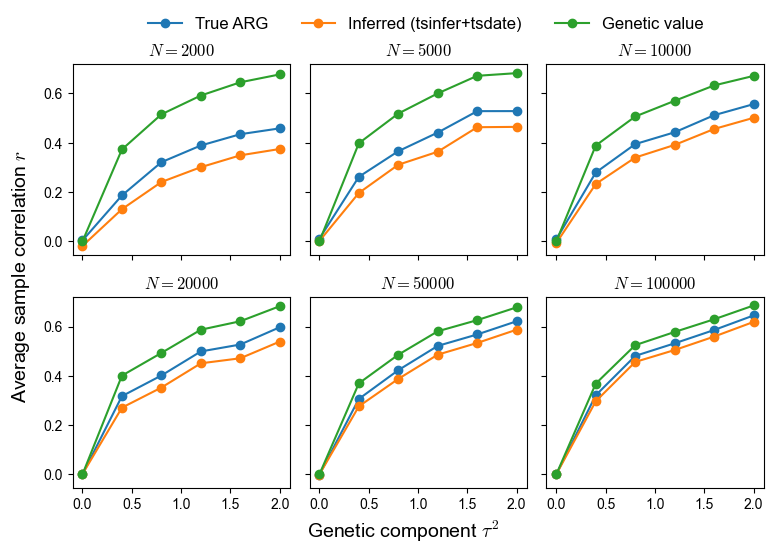

In [5]:
scale = 2.5
fig, ax = plt.subplots(2, 3, figsize=(3*scale, 2*scale), sharey=True, sharex=True)

tick_labels = np.linspace(0, 1, 6)
num_individuals = [2000, 5000, 10000, 20000, 50000, 100000]
for i in range(len(preds)):
    xidx, yidx = i // 3, i % 3
    ax[xidx, yidx].plot(np.linspace(0, 2, 6), corr[i][:,0], label='True ARG', marker="o")
    ax[xidx, yidx].plot(np.linspace(0, 2, 6), corr[i][:,1], label='Inferred (tsinfer+tsdate)', marker="o")
    ax[xidx, yidx].plot(np.linspace(0, 2, 6), corr[i][:,2], label='Genetic value', marker="o")

    ax[xidx, yidx].set_title(r'$N=%d$' % num_individuals[i])

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.92, 1.05), ncol=3, fontsize=12, frameon=False)

fig.text(-0.01, 0.5, r'Average sample correlation $r$', fontsize=14, rotation=90, ha='center', va='center')
fig.text(0.5, -0.01, r'Genetic component $\tau^2$', fontsize=14, ha='center', va='center')
plt.tight_layout()
plt.savefig('prediction.pdf', bbox_inches='tight')
plt.show()